Gradient descent is one of the most popular optimization algorithms, It is used to find the local minimum of a function, when it comes to machine learning how it works is by tweaking the parameters in an iterative way in order to find the minimum of a cost function, for example, the mean squared error (MSE). The parameters used by gradient descents are the local gradient of the cost function in relation to the model parameter vector, We start by doing a process called random initialization which consists of filling the model parameters with random values, then it gradually, step by step try to decrease the cost function in order to reach its minimum, this is the second parameter in gradient descent meaning the size of the steps, they are determined by the learning rate of a given model.
The problem with the learning rate parameter is if they are too small the algorithm will take a long time to converge, on the other hand, if the steps are too big the algorithm might end up diverging and possibly resulting in a higher cost function.
 one way to avoid this is by ensuring that the features have a similar scale, alternatively when applying the algorithm to MSE since that function is convex it is easier to find the minimum


Linear regression is a simple supervised learning model mainly used to predict the value on a dependant variable given a predictor variable (also called independent variables), it can be either a simple linear regression if we use one predictor variable or multivariate linear regression if we correlate multiple predictor. this model makes a prediction by computing a eighted sum of the predictor variable plus a constant that can either be called intercept or bias term.
- The advantage of linear regression is how simple its implementation is while still giving satisfactory results in plenty of cases,moreover, it doesn't require a lot of computational power due to how simple its mathematical equation is.
- Linear regression suffer from a lot of disavantages, first of all its prone to underfitting, its a situation that arise when a machine learning model fail to generalize the data properly and therefore, cannot predict it well. It is also sensisitve to outliers, meaning data that deviate extremely from other data points, this result in low accuracy in the predictions. 

The dataset I choose for this task, is the bike sharing dataset, it regroups the historical data on bicycle rentals, based on multiple predictor values ranging from the weather condition to the hour where the bike was rented. 

### Data checking and cleaning routine

We start our routine by Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

we now set the path for our dataset and we load it. 

In [90]:
path = r"C:\Users\imade\Desktop\AE1\Machine learning\hour.csv"

In [91]:
train = pd.read_csv(path)

Lets take a look at the dataset. 

In [92]:
train

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


The names of the columns are not obvious and can be confusing the more we delve in our analysis, I will procceed to rename them.

In [93]:
# Renaming columns names to more readable names
train.rename(columns={'instant':'id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'rental_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)



Lets take a look at the types of the features in our dataset , this is vital for the analysis later on.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  rental_count       173

Looking at the data, they are either float or integer, we also have an object data type

- Some features should be set as categorical
- The object datatype should be set as datetime
- some variables need to be denormalized

In [94]:
#function that reverses the minmax formula applied to some column
def reverse(x,t_min,t_max):

    return (x * (t_max - t_min))+t_min


In [95]:
#apply the reverser to temp columns 
train['temp'] = reverse(train['temp'],-8,39)
train['atemp'] = reverse(train['atemp'],-16,50)

In [11]:
#convert the date column into datatime
train['datetime'] = pd.to_datetime(train.datetime)

# set the categorical variables properly
train['season'] = train.season.astype('category')
train['is_holiday'] = train.is_holiday.astype('category')
train['weekday'] = train.weekday.astype('category')
train['weather_condition'] = train.weather_condition.astype('category')
train['is_workingday'] = train.is_workingday.astype('category')
train['month'] = train.month.astype('category')
train['year'] = train.year.astype('category')
train['hour'] = train.hour.astype('category')

In [12]:
train['datetime'] = train['datetime'].astype('datetime64')
#To use machine learning we need numerical values so we must split this column to numerical values
# train['datetime_year'] = train['datetime'].dt.year
# train['datetime_month'] = train['datetime'].dt.month
# train['datetime_day'] = train['datetime'].dt.day
# train['datetime_hour'] = train['datetime'].dt.hour

# train.drop(['datetime'], axis=1, inplace=True)
# for i in train.columns:        
#     if i in ['temp','atemp', 'windspeed']:
#         train[f'{i}'] = train[f'{i}'].astype('float16')
#     else:
#         train[f'{i}'] = train[f'{i}'].astype('int16')
        


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

We will now check for any missing values

In [14]:
# percentage of missing values in each column
round(100*(train.isnull().sum()/len(train)), 2).sort_values(ascending=False)

id                   0.0
weather_condition    0.0
registered           0.0
casual               0.0
windspeed            0.0
humidity             0.0
atemp                0.0
temp                 0.0
is_workingday        0.0
datetime             0.0
weekday              0.0
is_holiday           0.0
hour                 0.0
month                0.0
year                 0.0
season               0.0
rental_count         0.0
dtype: float64

There is no missing values in our dataset. 

### plots and feature selection. 

In this section we will visualise the data and proceed to select the most relevent features

In [15]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

checking for outliers in data 

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

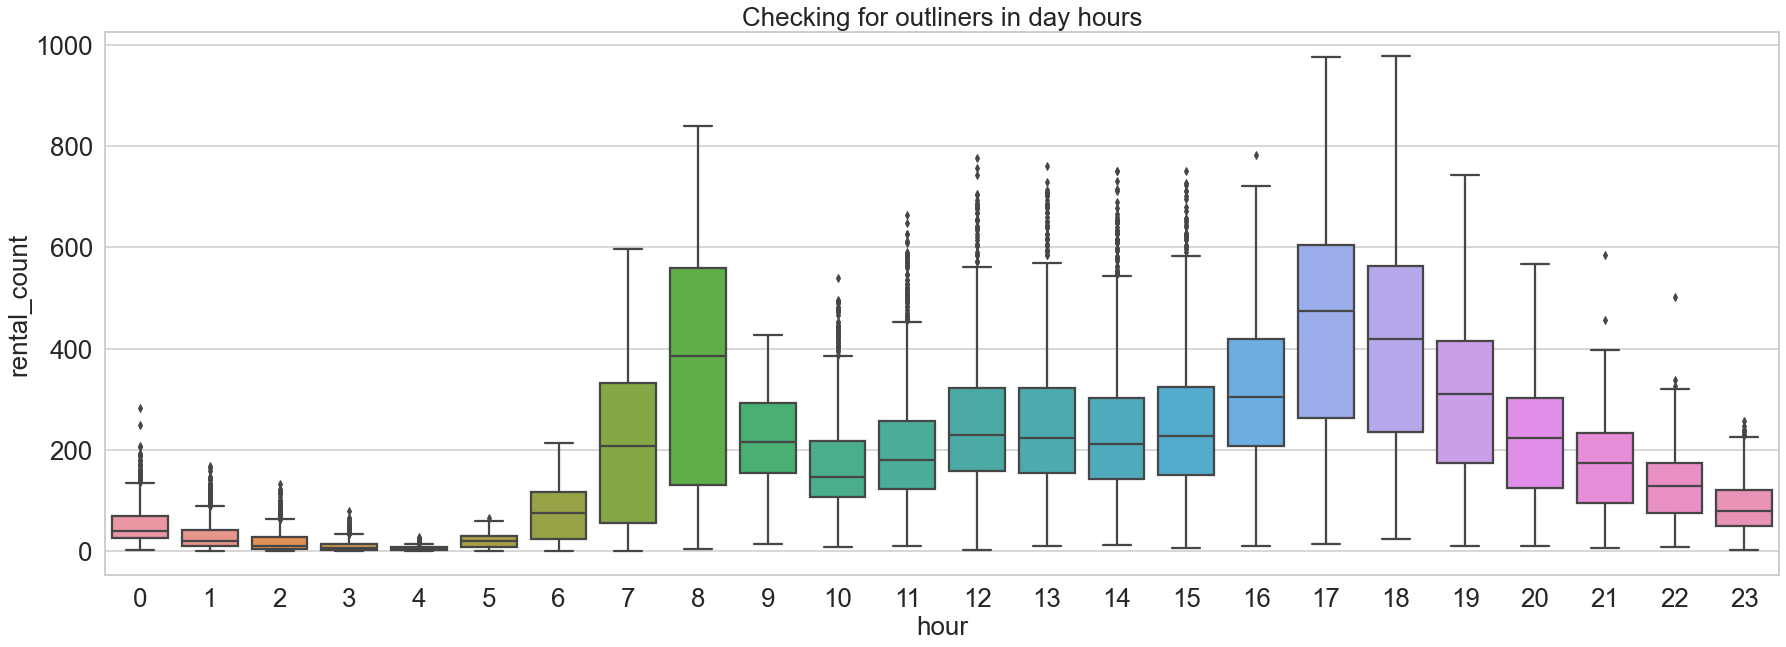

In [17]:
fig,ax = plt.subplots()
sns.boxplot(data=train[['rental_count',
                          'hour']],x='hour',y='rental_count',ax=ax)
ax.set(title="Checking for outliners in day hours")

We will now plot a correlation matrix to select the best features.

<AxesSubplot:>

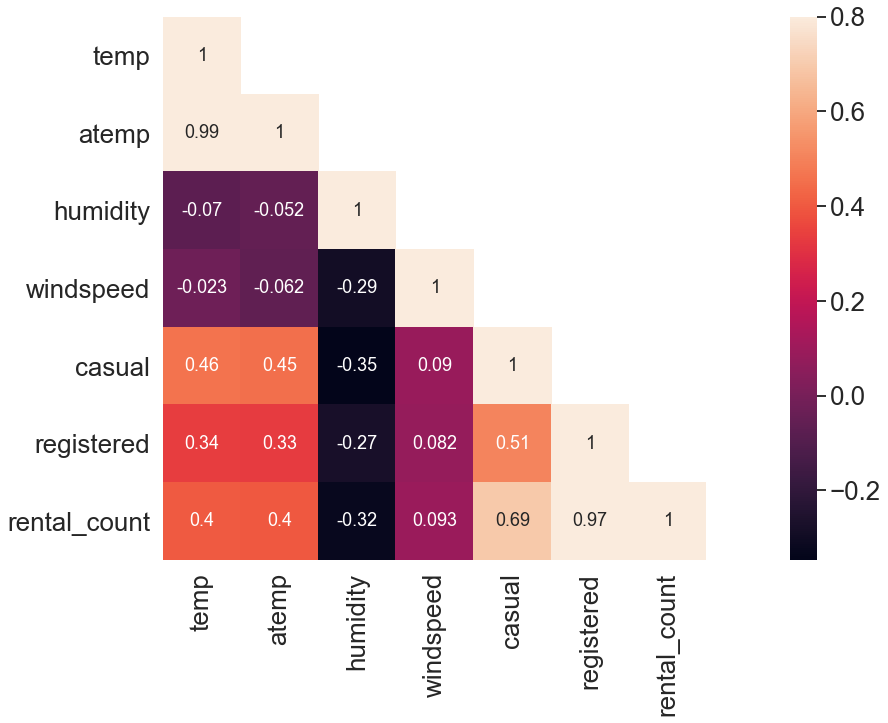

In [18]:
corrMatt = train[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'rental_count']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

temp,atemp,casual and registred are good features to use in our  linear regression analysis.

### Linear regression training

We set up the x and y and we split the data, the first linear regression we will perform will consist of a single feature for the predicator feature.

In [19]:
train

,id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,rental_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,3.28,3.0014,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,2.34,1.9982,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,2.34,1.9982,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3.28,3.0014,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,3.28,3.0014,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,4.22,1.0016,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,4.22,1.0016,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,4.22,1.0016,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,4.22,1.9982,0.56,0.1343,13,48,61


In [20]:
train.iloc[:,1:16]

,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01,1,0,1,0,0,6,0,1,3.28,3.0014,0.81,0.0000,3,13
1,2011-01-01,1,0,1,1,0,6,0,1,2.34,1.9982,0.80,0.0000,8,32
2,2011-01-01,1,0,1,2,0,6,0,1,2.34,1.9982,0.80,0.0000,5,27
3,2011-01-01,1,0,1,3,0,6,0,1,3.28,3.0014,0.75,0.0000,3,10
4,2011-01-01,1,0,1,4,0,6,0,1,3.28,3.0014,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,4.22,1.0016,0.60,0.1642,11,108
17375,2012-12-31,1,1,12,20,0,1,1,2,4.22,1.0016,0.60,0.1642,8,81
17376,2012-12-31,1,1,12,21,0,1,1,1,4.22,1.0016,0.60,0.1642,7,83
17377,2012-12-31,1,1,12,22,0,1,1,1,4.22,1.9982,0.56,0.1343,13,48


In [96]:
#we select the columns from season to registred 
x = train.iloc[:,2:16]
y = train['rental_count']

#x = train[['temp','atemp','casual','registered']]


#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

We will now use x and y to train our linear regression model

In [22]:
# Set the model
regressor = LinearRegression()
regressor.fit(X=x_train, y=y_train)

coefficient = regressor.coef_
intercept = regressor.intercept_
print('coefficient = ',coefficient)
print('intercept = ',intercept)

coefficient =  [-8.13677176e-14 -1.46105350e-13  2.51049181e-14 -3.54620847e-15
 -3.32893706e-14 -7.93804042e-15  7.72975976e-14 -1.55382434e-14
  4.67681449e-15 -3.88578059e-15  3.08026391e-13  1.06118239e-13
  1.00000000e+00  1.00000000e+00]
intercept =  2.8421709430404007e-13


In [23]:
# Predict with our model on x_test
y_predicted = regressor.predict(x_test)

In [24]:
metrics.mean_absolute_error(y_test, regressor.predict(x_test))

3.2521211142799674e-13

Feature scaling

In [26]:
# Feature scaling (standardized)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
# Set the model
regressor = LinearRegression()
regressor.fit(X=x_train, y=y_train)

coefficient = regressor.coef_
intercept = regressor.intercept_
print('coefficient = ',coefficient)
print('intercept = ',intercept)

coefficient =  [-4.96071584e-14  7.10542736e-14  3.19744231e-14  7.39963646e-14
  3.01980663e-14 -4.86832796e-14  6.46149800e-14 -5.86197757e-14
 -3.42836870e-13  3.89022148e-13  4.44089210e-14 -4.52970994e-14
  4.93367210e+01  1.50895917e+02]
intercept =  188.94720563907072


In [28]:
print("Prediction\n", regressor.predict(x_test)[:10])

Prediction
 [  7.  37.  56.  71.   4.  80.  24. 329. 218. 294.]


In [29]:
regressor = linear_model.SGDRegressor(random_state = 0, max_iter=1000,)
regressor.fit(x_train, y_train)
metrics.mean_absolute_error(y_test, regressor.predict(x_test))

0.01555394753267436

In [29]:
print("Prediction\n", regressor.predict(x_test)[:10])

Prediction
 [  6.99740187  37.01651254  56.01118845  71.01253166   4.03630874
  80.00419338  24.01830339 329.00165954 218.00903356 294.00531669]


4. State and justify the cost function used. What is the difference between a global and local minimum in the cost function? Why is it desirable for these error functions to be convex? Plot the linear regression best fit line through the data set in a graph.

The cost function that I will use here is mean absolute error(MAE), the reason for this is, as stated previously the data seem to contain a some outliers features, MAE is perfect for that task because they make it so outliers don't play a bit role.furthermore, the distribution of our data is also multimodal, MSE make it so the prediction is at one of the modes, rather than the mean of them.

The difference between the global and local minimum definition is linked to the reason why it is desirable for the cost function to be convex, the local minimum is a point where our function is lower than its neighboring points, this is also the case for the global minimum, the problem rises when the function is not convex, it may so happen that the function have multiple minimum value at different points, they might appear as the minima but they are not the point where the function reaches the absolute minima possible,this will lead the algorithm to get stuck in a local minimum when training the model, the only realistic way to solve it is to exponentially increase the number of steps,on the contrary, if the cost function is bowl shaped(convex) it will only take a limited number of steps to reach the global minimum without ever worriying of getting stuck in the local minimum. 

In [25]:
import sklearn.metrics as metrics
print('MAE: {}'.format(np.sqrt(metrics.mean_absolute_error(y_test, regressor.predict(x_test)))))

MAE: 2443397.81570881


In [46]:
regressor = linear_model.SGDRegressor(random_state = 0, max_iter=1000,loss='epsilon_insensitive',penalty='l2')
regressor.fit(x_train, y_train)
#metrics.mean_absolute_error(y_test, regressor.predict(x_test))
print("Prediction\n", regressor.predict(x_test)[:10])

Prediction
 [193.84064961 140.23774434 131.28014332 215.25514446 131.28014332
  90.33881858 245.62724034 242.09227231 175.96112278 167.03919698]


In [47]:
#we select the columns from season to registred 
x = train.loc[:,['temp','atemp']]
y = train['rental_count']

#x = train[['temp','atemp','casual','registered']]


#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

In [48]:
# Feature scaling (standardized)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
# Set the model
X = train['temp'].values[:,np.newaxis]
y= train['rental_count'].values
regressor = LinearRegression()
regressor.fit(X, y)

coefficient = regressor.coef_
intercept = regressor.intercept_
print('coefficient = ',coefficient)
print('intercept = ',intercept)

coefficient =  [8.11265792]
intercept =  64.86566725062167


In [50]:
coefficient[0]

8.11265792040797

In [51]:
train

,id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,rental_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,3.28,3.0014,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,2.34,1.9982,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,2.34,1.9982,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3.28,3.0014,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,3.28,3.0014,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,4.22,1.0016,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,4.22,1.0016,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,4.22,1.0016,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,4.22,1.9982,0.56,0.1343,13,48,61


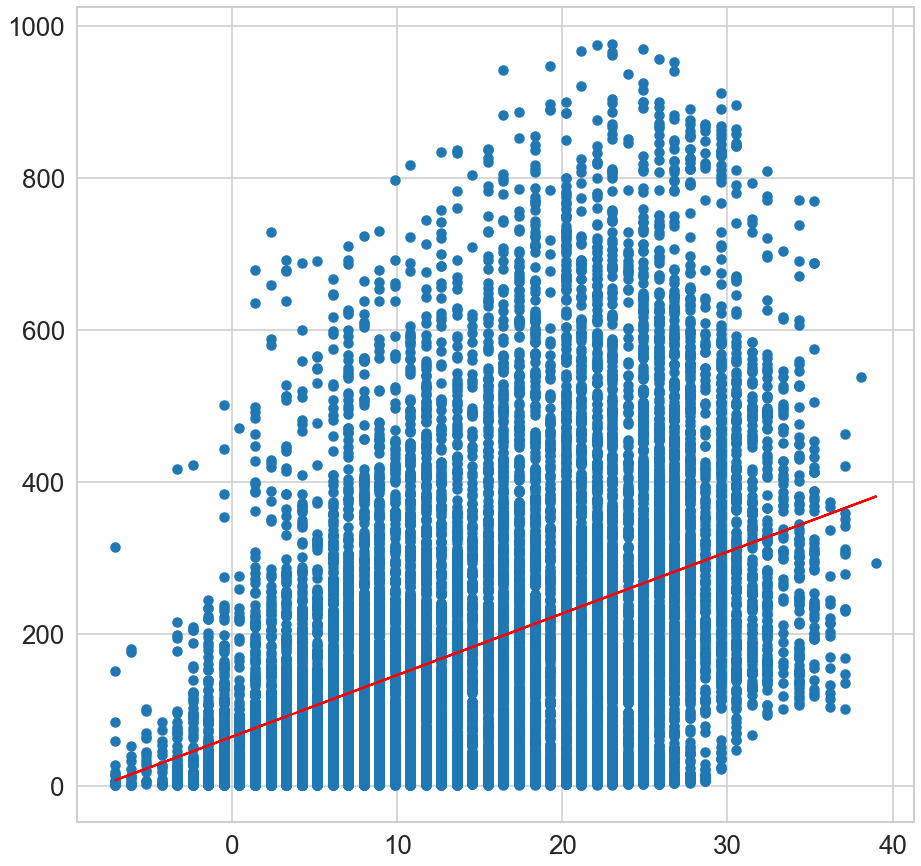

In [52]:
fig,ax = plt.subplots(figsize=(15,15))
# m = coefficient[0]
# b = intercept 
#a, b = np.polyfit(coefficient[0], intercept, 1)
ax.scatter(X,y)
plt.plot(X,regressor.predict(X) ,color='red')
plt.show()

6. Using SciKit-Learn, write a routine to use polynomial regression against the same dataset.

In [97]:
#we select the columns from season to registred 
x = train['temp'].values[:,np.newaxis]
y = train['rental_count']


#x = train[['temp','atemp','casual','registered']]


#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

In [58]:
# Set the model
poly  = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly, y)
coefficient = regressor.coef_
intercept = regressor.intercept_
print('coefficient = ',coefficient)
print('intercept = ',intercept)

coefficient =  [0.         7.23041726 0.0287728 ]
intercept =  69.2720294028491


7. Explain the circumstances under which you use linear, or polynomial, or batch regression.

#### Linear regression
- We use linear regression when we have a linear relationship between one or more independent feature and a dependent one, this should be determined first before attempting to train the model, one way to use it is by using multiple visualization techniques that range from scatter plots to pairplots if we have multiple features
- Every feature in the data is Normally Distributed.
- There should be little or no multi-collinearity in the data.
#### Polynomial regression
- Polynomial Regression is generally used when the data points are not well fitted  by a standard Linear Regression Model because its more complex than a simple straight line and it fails to generalize and predict the dependent variable.
- it is used if the relationship between the dependent variable and any independent variable is curvilinear.
- Unlike linear regression, polynomial regression doesn't require that the dependent and independent variables to be linearly correlated.
#### batch regression
- Batch regression, or batch learning in general is used when we have to train our data offline, and all at once, so when it is lanched into production it doesn't run into the learning process anymore.
- If there is no continious flow of data coming in the system, or there is no need to adjust the data rapidly, and the size of that data is small enough, it is preferable to use batch regression. 

8. Explain what is meant by the Bias and Variance trade-off both in general, and with reference to the dataset you are analysing.

When training a supervised machine learning algorithm we will stumble upon what we call prediction errors, namely bias error and variance error. 
- the Bias error is the difference between the average prediction of our model and the correct value which we are trying to predict.
- Variance is the variability of model prediction for a given data point or a value which tells us spread of our data.
The bias and variance trade-off is when we try to balance out the varience and variance, the goal of any supervised machine learning algorithm is to lean toward low bias and low variance, for lack of actually achieving it.in general Linear machine learning models often have a high bias but a low variance, on the contrary,Nonlinear machine learning algorithms often have a low bias but a high variance.
https://www.machinelearningplus.com/machine-learning/bias-variance-tradeoff/

9. Explain two further regression methods. When would you use them? What are their advantages? Use these two additional regression methods against the dataset you have chosen. Document the results. Compare the new results with those generated by the original gradient descent method you used.

The first regression method I will discuss is the regression-based decision tree, decision tree work by breaking down the dataset into smaller subset called nodes, while at the same time another decision tree is incrementally developed. the final result we end up with is a tree-like structure with what we call decision nodes and leaf nodes. A decision node has at least two or more branches for each feature for the attribute tested. regarding leaf nodes they represent an observation of the target, we want to predict, this observation act as a decision. The predictor of choice is selected by the root node, which is the topmost decision node in that tree.

Application on the dataset: 

In [50]:
#we select the columns from season to registred 
x = train.iloc[:,2:16]
y = train['rental_count']

#x = train[['temp','atemp','casual','registered']]


#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

In [51]:
# Feature scaling (standardized)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
#loading the model from scikit learn library
from sklearn.tree import DecisionTreeRegressor 
#setting the model
regressor = DecisionTreeRegressor(random_state=0)
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

In [44]:
y_pred = regressor.predict(x_test)

In [45]:
y_pred

array([  7.,  38.,  57., ...,  68., 395.,  95.])

We compare our model with the gradient descend method used previously. 

In [46]:
metrics.mean_absolute_error(y_test, regressor.predict(x_test))

2.3872266973532796

In [41]:
regressor = linear_model.SGDRegressor(random_state = 0, max_iter=1000,)
regressor.fit(x_train, y_train)
metrics.mean_absolute_error(y_test, regressor.predict(x_test))

0.01555394753267436

The error margin seems low in both cases but Since Mean absolute errors compute the sum of errors by checking how far the forecast is from the actual values, the decision tree regressor does worse than the gradient descent based model, if we actually compute the difference in term of accuracy between the 2 models decision tree is 153 times less accurate than sgdregressor. 

For our present dataset, it is not that dramatic, but if we scale it to real-life datasets that we usually find in the industry this difference is quite dramatic in the model choosing phase.


The second regression model of choice is Gaussian process regression, it's a non-parametric Bayesian approach to regression that works by interpolating the observations made on the regular kernels and making a prediction from them, those predictions are probabilistic in the gaussian sense of the term, it compute empirical confidence confident intervals and decide based on those if it should refit

Implementation

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
#setup the kernels
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
#setting up the regressor
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gaussian_process.fit(x_train[:2000], y_train[:2000])
gaussian_process.kernel_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


51.3**2 * RBF(length_scale=100)

In [33]:
y_pred = gaussian_process.predict(x_test)

In [34]:
metrics.mean_absolute_error(y_test, y_pred)

0.18202374047671904

Much better result that can than what we got from the decision tree regressor we are still 10 times less accurate than sgd regressor. 

It seems that the gradient descent linear regression model is the most appropriate for the regression task on this dataset according to the experiments so far


10. Explain what is meant by a decision boundary in general? Indicate in the example dataset you have used above where is the decision boundary.

In this notebook, we mainly discussed regression models, which can be summarized as trying to predict a values. The concept of decision boundary usually applies to classification tasks,classification is when we try to label data into categories.In general a classifier model will partitions the features( also called feature space) into what we call decision region, the features that are in the same decision region are assigned the same label, The decision regions are often simply connected, but they can be multiply connected as well, consisting of two or more non-touching regions, the surface that seperate those region is what we call **decision boundary**, it is the relationship between two or more category.

In my dataset There are two field that specify if a user is either a casual or a registred when he proceed to do a bike location, the decision boundary will be set on those parameter

In [69]:
train[['registered','casual']]

,registered,casual
0,13,3
1,32,8
2,27,5
3,10,3
4,1,0
...,...,...
17374,108,11
17375,81,8
17376,83,7
17377,48,13


#### Questions on Support Vector Machines 

11. What are support vector machines? Under what circumstances would you use them? What are the characteristics of the problems that SVMs are best suited to? What do we mean by margin classification? 

Support vector machines are supervised learning models that can perform either classification or regression analysis, but it is mostly used for classification, the SVM algorithm works by plotting data as points in s n-dimensional space, then it performs what was explained earlier as decision boundary by finding the hyperplane coordinate that separates the features into their respective category, the type of problem that svm is best suited for are within datasets with high dimensional spaces .It is important to note that we need linearly seperated data otherwise this data will need to be trainformed using kernels. 

Margin classification is the ability of a classifier to compute an associated distance from the decision boundary for each feature data. SVM propose two types of margins, hard-margin, in the case where the training data is linear separable and soft-margin in case the data is not linearly separable 

12.Choose a dataset from an open-source repository. Write a routine using SciKitLearn to load a dataset and use a SVM to make classification predictions using
support vector machines

The dataset that I choose for this task is mobile price classification, where we have the technical specifications of multiple models of mobile phones and labelled in a specific price range, the classification task will consist of predicting the price range of a mobile phone given its technical characteristics.

In [4]:
#we load the datasets
train = r"C:\Users\imade\Desktop\AE1\Machine learning\train.csv"
test = r"C:\Users\imade\Desktop\AE1\Machine learning\test.csv"

In [5]:
train = pd.read_csv(train)
test = pd.read_csv(test)

In [68]:
#we set our x and y value, no need to split the data as we have a dedicated test dataset 
y = np.array(train['price_range'])
x = train
x = train.drop(['price_range'],axis=1)


In [69]:
#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

In [95]:
#we now train our classifier with the default hyper parameters 
from sklearn.svm import SVC

clf = SVC().fit(x_train,y_train)



13.Comment on the predictions that the SVM has made with specific reference to accuracy and robustness to noise in data of the prediction.

Before commenting on the predictions lets first visualise our accuracy score on both the training and the testing split

In [96]:
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))


training score :0.966875 , Test Score: 0.877500 



the distance in term of accuracy between the training and testing split is relatively small, we can confidently say that our model is highly accurate, the result is actually quite surprising as no data cleaning nor feature selection have been made when training this model, the features present in the data are quite noisy as we have different scales and types of data present in it. Let’s try our model with different regularization parameters.

In [105]:
for c in [10,40,60,80,100]:
    clf = SVC(C=c).fit(x_train,y_train)
    scoretrain = clf.score(x_train,y_train)
    scoretest  = clf.score(x_test,y_test)
    print("Regularization parameter:{}, training score :{:2f} , Test Score: {:2f} \n".format(c,scoretrain,scoretest))

Regularization parameter:10, training score :1.000000 , Test Score: 0.897500 

Regularization parameter:40, training score :1.000000 , Test Score: 0.890000 

Regularization parameter:60, training score :1.000000 , Test Score: 0.890000 

Regularization parameter:80, training score :1.000000 , Test Score: 0.890000 

Regularization parameter:100, training score :1.000000 , Test Score: 0.890000 



We have a surprising 100% accuracy score with the training set as soon as we set up a regularization parameter, but the accuracy goes down as soon as we go over 10.

14. Modify your code to use SciKit-Learn to include polynomial regression, standard scalars, and a linear SVC. Provide graphs that show the results that these new methods produce.

In [75]:
x = np.array(train.iloc[:,[0,13]])
y = np.array(train['price_range'])


In [76]:
#we apply standard scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

In [31]:
from sklearn.svm import SVC

#we setup the svm classifier to include polynomial regression
clf = SVC(kernel = 'poly')
clf.fit(x_train,y_train)
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

training score :0.826875 , Test Score: 0.837500 



Outstanding accuracy score

Lets now visualize our decision boudaries using our polynomial regression model

<ipython-input-32-2a797ca401a7>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


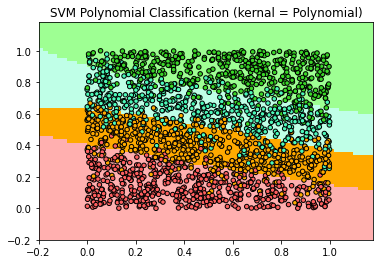

In [32]:
from matplotlib.colors import ListedColormap
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
C_param = 1
h = .02
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min()-.20, x[:, 0].max()+.20
y_min, y_max = x[:, 1].min()-.20, x[:, 1].max()+.20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_dark,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Polynomial Classification (kernal = Polynomial)")

plt.show()

We can deduce from this plot that svm with polynomial regression has an almost perfect liberalization with a good capacity to generalize.

we train a linear svc model 

In [33]:
#we import linear SVC
from sklearn.svm import LinearSVC

#we set up the classifier as polynomial 
clf = LinearSVC()
clf.fit(x_train,y_train)
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

training score :0.771250 , Test Score: 0.797500 



Good score but not as good as regular svm with polynomial regression.

We will now proceed to the visualization of the decision boudaries using linear SVC

<ipython-input-34-72f9d0275489>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


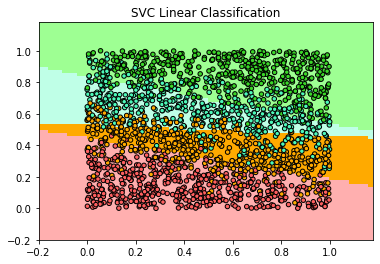

In [34]:
from matplotlib.colors import ListedColormap
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
C_param = 1
h = .02
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min()-.20, x[:, 0].max()+.20
y_min, y_max = x[:, 1].min()-.20, x[:, 1].max()+.20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_dark,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVC Linear Classification")

plt.show()

Contrary to svm with polynomial regression, linear SVC is less precise when drawing the decision boundaries for this specific task and dataset 

15. Modify your code to use SciKit-Learn to include the Gaussian RBF kernel to model your data. Implement this in SciKit-Learn against your chosen dataset. Explain what benefits your Guassian RBF kernel has generated, and why you chose the values for the hyper-parameters to optimise the effectiveness of the Gaussian RBF.

I will start by only applying Gaussian RBF without necessarily choosing any specific hyperparameters

In [39]:
from sklearn.svm import SVC

#we setup the svm classifier to include gaussian RBF
clf = SVC(kernel = 'rbf')
clf.fit(x_train,y_train)
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

training score :0.951250 , Test Score: 0.950000 



We already have a pretty high score, I will proceed now the hyperparameter selection 

In [42]:
for c in [10,40,60,80,100]:
    clf = SVC(kernel = 'rbf',C=c)
    clf.fit(x_train,y_train)
    scoretrain = clf.score(x_train,y_train)
    scoretest  = clf.score(x_test,y_test)
    print("Regularization parameter:{}, training score :{:2f} , Test Score: {:2f} \n".format(c,scoretrain,scoretest))

Regularization parameter:10, training score :0.964375 , Test Score: 0.967500 

Regularization parameter:40, training score :0.974375 , Test Score: 0.965000 

Regularization parameter:60, training score :0.974375 , Test Score: 0.967500 

Regularization parameter:80, training score :0.978125 , Test Score: 0.975000 

Regularization parameter:100, training score :0.978750 , Test Score: 0.972500 



It seems like the regulization parameter don't matther in term of accuracy as the improvement is not really significant, I will at least set it at C = 10 so the classifier will be  less tolerant to misclassified data points and therefore the decision boundary will be more severe.

We will now select the spread of the kernel.

In [44]:
for g in [.01,1,10,100]:
    clf = SVC(kernel = 'rbf',C=10, gamma = g )
    clf.fit(x_train,y_train)
    scoretrain = clf.score(x_train,y_train)
    scoretest  = clf.score(x_test,y_test)
    print("Regularization parameter:{}, training score :{:2f} , Test Score: {:2f} \n".format(c,scoretrain,scoretest))
    

Regularization parameter:100, training score :1.000000 , Test Score: 0.235000 

Regularization parameter:100, training score :1.000000 , Test Score: 0.235000 

Regularization parameter:100, training score :1.000000 , Test Score: 0.235000 

Regularization parameter:100, training score :1.000000 , Test Score: 0.235000 



This just gave us less accuracy in the training, we will plot the result and see if there is a visual improvement.

We retrain the model with the select hyper parameters 

In [53]:
clf = SVC(kernel = 'rbf',C=10, gamma = 0.01)
clf.fit(x_train,y_train)

SVC(C=10, gamma=0.01)

<ipython-input-54-2efc8cde0a8f>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


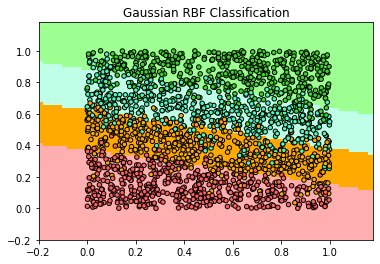

In [54]:
from matplotlib.colors import ListedColormap
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
C_param = 1
h = .02
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min()-.20, x[:, 0].max()+.20
y_min, y_max = x[:, 1].min()-.20, x[:, 1].max()+.20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_dark,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Gaussian RBF Classification")

plt.show()

16. Use three further kernel methods to perform the analysis in step 5. Compare the results. Suggest ideas for improving the kernels you have used.

Sigmoid kernel

We first select the number of epoch using gridsearchCV

In [65]:
param_grid = {
    'max_iter' : [10,100,1000,2000]
}

In [57]:
from sklearn.model_selection import GridSearchCV

In [72]:

clf = SVC(kernel = 'sigmoid')

cv = GridSearchCV(clf, param_grid)
cv.fit(x_train,y_train)


C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages

GridSearchCV(estimator=SVC(kernel='sigmoid'),
             param_grid={'max_iter': [10, 100, 1000, 2000]})

In [73]:
cv.best_params_

{'max_iter': 1000}

we train our model using the parameters suggested.

In [82]:
clf = SVC(kernel = 'sigmoid',max_iter ='1000')
clf.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [83]:
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

training score :0.059375 , Test Score: 0.042500 



very poor accuracy score this kernel is not at all adapted to our dataset and should be discared as a choice for classification 

precomputed kernel

In [85]:
clf = SVC(kernel = 'precomputed')
clf.fit(x_train,y_train)
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

ValueError: Precomputed matrix must be a square matrix. Input is a 1600x2 matrix.

This dataset is not adapted for this kernel, it's the only one left that we didn't already train, therefore it will to be discarded in this technical report

Finally the linear kernel.

In [87]:
clf = SVC(kernel = 'linear')

cv = GridSearchCV(clf, param_grid)
cv.fit(x_train,y_train)
cv.best_params_

C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages

{'max_iter': 1000}

we now train the model using the suggested epoch

In [89]:
clf = SVC(kernel = 'linear',max_iter = '1000')
clf.fit(x_train,y_train)
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

training score :0.823125 , Test Score: 0.837500 



very good accuracy score, this kernel is more suited for our classification task.
To get better results we should run the grid search on every single parameter but this needs important computational resources.